<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

## Load DataSet

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names

1. Title: 1984 United States Congressional Voting Records Database

2. Source Information:
    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                 Washington, D.C., 1985.
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987 

3. Past Usage
   - Publications
     1. Schlimmer, J. C. (1987).  Concept acquisition through 
        representational adjustment.  Doctoral dissertation, Department of 
        Information and Computer Science, University of California, Irvine, CA.
        -- Results: about 90%-95% accuracy appears to be STAGGER's asymptote
     - Predicted attribute: party affiliation (2 classes)

4. Relevant Information:
      This data set includes votes for each of the U.S. House of
      Representatives Congressmen on the 16 key votes identified by the
      CQA.  The CQA lists nine different types of votes: voted for, paired
      

## Organize Data

In [4]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, na_values='?')
print(data.shape)
data.head()

(435, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [5]:
data.isna().sum()

0       0
1      12
2      48
3      11
4      11
5      15
6      11
7      14
8      15
9      22
10      7
11     21
12     31
13     25
14     17
15     28
16    104
dtype: int64

In [0]:
data = data.fillna(.5)

In [0]:
columns = {0:'class_name',
           1:'handicapped_infants',
           2:'water_project_cost_sharing',
           3:'adoption_of_the_budget_resolution',
           4:'physician_fee_freeze',
           5:'el_salvador_aid',
           6:'religious_groups_in_schools',
           7:'anti_satellite_test_ban',
           8:'aid_to_nicaraguan_contras',
           9:'mx_missile',
           10:'immigration',
           11:'synfuels_corporation_cutback',
           12:'education_spending',
           13:'superfund_right_to_sue',
           14:'crime',
           15:'duty_free_exports',
           16:'export_administration_act_south_africa'}

In [8]:
data = data.rename(columns=columns)
print(data.shape)
data.head()

(435, 17)


,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,0.5,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,0.5
2,democrat,0.5,y,y,0.5,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,0.5,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,0.5,y,y,y,y


In [0]:
new_vals = {'n': 0, 'y': 1}

In [10]:
# Replace 'n' and 'y' with 1 and 0
df = data.replace(new_vals)
df.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


In [0]:
democrats = df.loc[df['class_name'] == 'democrat']
republicans = df.loc[df['class_name'] == 'republican']

In [12]:
democrats.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0


In [13]:
mean_votes = pd.DataFrame({'democrats_mean': democrats.mean(),
                           'democrats_std': democrats.std(),
                           'republicans_mean': republicans.mean(),
                           'republicans_std': republicans.std()})

mean_votes

,democrats_mean,democrats_std,republicans_mean,republicans_std
handicapped_infants,0.601124,0.481889,0.193452,0.390476
water_project_cost_sharing,0.501873,0.473941,0.505952,0.470660
adoption_of_the_budget_resolution,0.878277,0.317379,0.142857,0.342336
physician_fee_freeze,0.067416,0.235772,0.979167,0.126611
el_salvador_aid,0.228464,0.407005,0.943452,0.221762
religious_groups_in_schools,0.477528,0.491909,0.892857,0.305356
anti_satellite_test_ban,0.764045,0.416460,0.250000,0.423840
aid_to_nicaraguan_contras,0.823970,0.376602,0.175595,0.359390
mx_missile,0.739700,0.418820,0.122024,0.321379
immigration,0.471910,0.496375,0.556548,0.493750


## Tests

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import seaborn as sns

In [15]:
mean_votes

,democrats_mean,democrats_std,republicans_mean,republicans_std
handicapped_infants,0.601124,0.481889,0.193452,0.390476
water_project_cost_sharing,0.501873,0.473941,0.505952,0.470660
adoption_of_the_budget_resolution,0.878277,0.317379,0.142857,0.342336
physician_fee_freeze,0.067416,0.235772,0.979167,0.126611
el_salvador_aid,0.228464,0.407005,0.943452,0.221762
religious_groups_in_schools,0.477528,0.491909,0.892857,0.305356
anti_satellite_test_ban,0.764045,0.416460,0.250000,0.423840
aid_to_nicaraguan_contras,0.823970,0.376602,0.175595,0.359390
mx_missile,0.739700,0.418820,0.122024,0.321379
immigration,0.471910,0.496375,0.556548,0.493750


In [16]:
df.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


## handicapped_infants Republican Favor

In [17]:
# Create DF with criteria needed

df1 = df[['class_name', 'handicapped_infants']]
print(df1.shape)
df1.head()

(435, 2)


,class_name,handicapped_infants
0,republican,0.0
1,republican,0.0
2,democrat,0.5
3,democrat,0.0
4,democrat,1.0


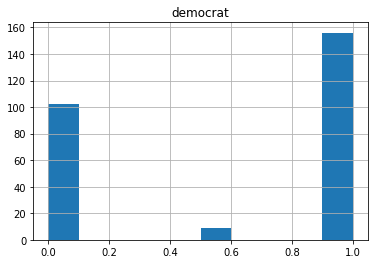

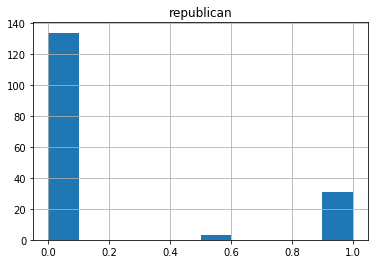

In [18]:
# Visulizations to help

df1.loc[df1['class_name'] == 'democrat'].hist()
plt.title('democrat')
df1.loc[df1['class_name'] == 'republican'].hist()
plt.title('republican')
plt.show()

In [19]:
# democrat mean

dmean1 = df1.loc[df1['class_name'] == 'democrat'].mean()
dstd1 = df1.loc[df1['class_name'] == 'democrat'].std()
print('mean: ', dmean1)
print('std: ', dstd1)

mean:  handicapped_infants    0.601124
dtype: float64
std:  handicapped_infants    0.481889
dtype: float64


In [20]:
# republican mean

rmean1 = df1.loc[df1['class_name'] == 'republican'].mean()
rstd1 = df1.loc[df1['class_name'] == 'democrat'].std()
print('mean: ', rmean1)
print('std: ', rstd1)

mean:  handicapped_infants    0.193452
dtype: float64
std:  handicapped_infants    0.481889
dtype: float64


H<sub>0</sub> : $\overline{x}$<sub>a</sub> = $\overline{x}$<sub>b</sub><br/>
H<sub>a</sub> : $\overline{x}$<sub>a</sub> != $\overline{x}$<sub>b</sub><br/>

H<sub>0</sub> : $\overline{x}$<sub>democrats</sub> = .19<br/>
H<sub>a</sub> : $\overline{x}$<sub>democrats</sub>  != .19<br/>

In [21]:
zscore = (rmean1 - dmean1) / rstd1
print(zscore)

handicapped_infants   -0.845986
dtype: float64


### Lecture Replication

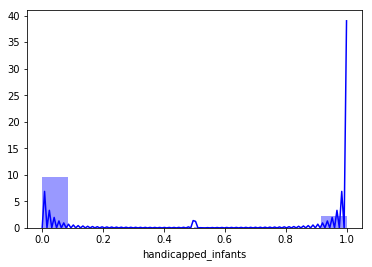

In [22]:
# More Visualisations from lecture

sns.distplot(df1[df1['class_name'] == 'republican']['handicapped_infants'], color='b')

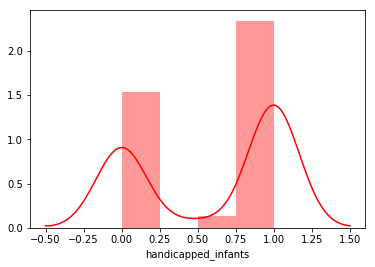

In [23]:
sns.distplot(df1[df1['class_name'] == 'democrat']['handicapped_infants'], color='r')

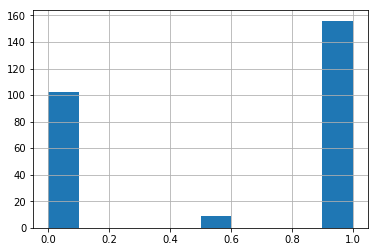

In [24]:
# not sure why the seaborn y axis is wrong

df1[df1['class_name'] == 'democrat']['handicapped_infants'].hist()

In [119]:
# Replicating code from lecture

tstat, pvalue = ttest_ind(df1[df1['class_name'] == 'republican']['handicapped_infants'],
                          df1[df1['class_name'] == 'democrat']['handicapped_infants'])
print(f'{tstat:10f}')
print(pvalue)

# pvalue is very small
# after replicating the code from the lecture I still have no idea how I got to these numbers or what they mean

 -9.223178
1.2761169357253626e-18


### Sampled Test

In [121]:
# create array of dem and rep votes to sample/simulate from

r1 = np.array(df1['handicapped_infants'].loc[df1['class_name'] == 'republican'])
d1 = np.array(df1['handicapped_infants'].loc[df1['class_name'] == 'democrat'])
print(r1)
print(d1)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.
 1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  0.
 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.
 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.
 0.  0.  0.  0.  1.  0.5 0.  0.  0.  0.5 0.  1.  0.  0.  0.  0.  1.  1.
 1.  0.  0.  0.  0.  0. ]
[0.5 0.  1.  0.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.
 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.5 1.  1.  1.  0.  0.
 1.  0.  1.  0.  0.  0.  0.  0.5 1.  0

In [0]:
import random
from statistics import mean, stdev

In [0]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=50)

In [74]:
# bootstrap testing

apples = [1, 2, 4, 5, 6, 7, 8, 9]

a_sample = bootstrap_sample(apples)
a_sample

[5,
 2,
 2,
 1,
 2,
 9,
 5,
 6,
 5,
 5,
 2,
 6,
 4,
 8,
 6,
 7,
 5,
 2,
 4,
 9,
 7,
 2,
 9,
 4,
 5,
 6,
 5,
 5,
 4,
 5]

In [93]:
# Create Samples with replacement

r1_sample = bootstrap_sample(r1)
d1_sample = bootstrap_sample(d1)

print(mean(r1_sample))
mean(r1)

0.16


0.19345238095238096

In [94]:
r1_sample_df = pd.DataFrame(r1_sample)
d1_sample_df = pd.DataFrame(d1_sample)

print(r1_sample_df.shape)
r1_sample_df.head()

(50, 1)


,0
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93fee8d240>]],
      dtype=object)

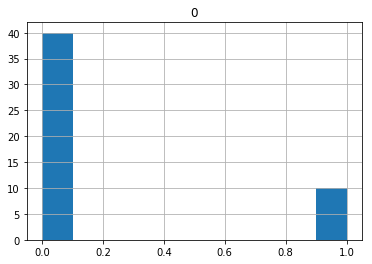

In [86]:
r1_sample_df.hist()

In [109]:
print('republican mean:', r1_sample_df.mean())
print('republican st Dev:', r1_sample_df.std())
print(r1_sample_df.shape)

print('---' * 10)

print('democrat mean:', d1_sample_df.mean())
print('democrat st Dev:', d1_sample_df.std())
print(d1_sample_df.shape)

republican mean: 0    0.16
dtype: float64
republican st Dev: 0    0.370328
dtype: float64
(50, 1)
------------------------------
democrat mean: 0    0.57
dtype: float64
democrat st Dev: 0    0.494975
dtype: float64
(50, 1)


In [101]:
ttest_ind(r1_sample_df, d1_sample_df)

Ttest_indResult(statistic=array([-4.68981796]), pvalue=array([8.856116e-06]))

In [102]:
ttest_ind(r1_sample, d1_sample)

Ttest_indResult(statistic=-4.689817962710757, pvalue=8.856115997226252e-06)

In [140]:
# Calculate t stat and pvalue for issue one

tstat, pvalue = ttest_ind(r1_sample, d1_sample)
print('t stat:', f'{tstat:.3f}')
print('pvalue:', f'{pvalue:.7f}')

t stat: -4.690
pvalue: 0.0000089


We can reject the null hypotheses because 0.0000089 < 0.01<br/>

This shows that the Republican party sample favored this issue much more that the democrats.<br/>
The Republicans and Democrats voting samples shared a pvalue of .000009.<br/>
The pvalue is the probability the sample came from the same population.

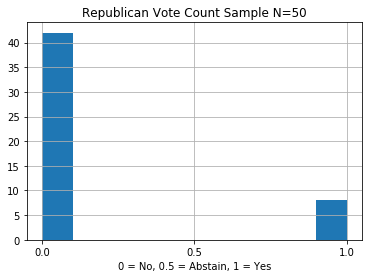

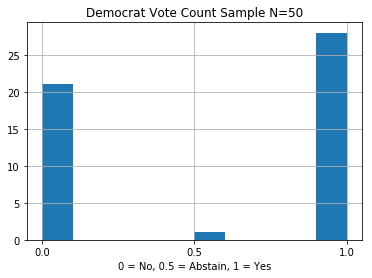

In [141]:
r1_sample_df.hist();
plt.title('Republican Vote Count Sample N=50')
plt.xticks([0,.5,1])
plt.xlabel('0 = No, 0.5 = Abstain, 1 = Yes')
plt.show()
d1_sample_df.hist();
plt.title('Democrat Vote Count Sample N=50')
plt.xticks([0,.5,1])
plt.xlabel('0 = No, 0.5 = Abstain, 1 = Yes')
plt.show()

##  aid_to_nicaraguan_contras Democrat favor

In [120]:
# Create DF with criteria needed

df2 = df[['class_name', 'aid_to_nicaraguan_contras']]
print(df1.shape)
df2.head()

(435, 2)


,class_name,aid_to_nicaraguan_contras
0,republican,0.0
1,republican,0.0
2,democrat,0.0
3,democrat,0.0
4,democrat,0.0


In [123]:
# create array of dem and rep votes to sample/simulate from

r2 = np.array(df2['aid_to_nicaraguan_contras'].loc[df2['class_name'] == 'republican'])
d2 = np.array(df2['aid_to_nicaraguan_contras'].loc[df2['class_name'] == 'democrat'])
print(r2)
print(r2)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.5
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
 0.  1.  1.  1.  0.  0.  0.  0.  0.5 0.  0.  0.  1.  1.  0.  1.  1.  0.
 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.  0.  0.5 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.
 1.  0.  0.  0.5 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.5 0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.  0.  0.  1.  0.  0.5 0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
 1.  1.  0.  0.  0.5 0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.5
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
 0.  1.  1.  1.  0.  0.  0.  0.  0.5 0.  0.  0.  1.  1.  0.  1.  1.  0.
 0.5 0.  0.  0.  0.  0.  0.  0.  0. 

In [124]:
# Create Samples with replacement

r2_sample = bootstrap_sample(r2)
d2_sample = bootstrap_sample(d2)

print(mean(r2_sample))
mean(r2)

0.15


0.17559523809523808

In [125]:
r2_sample_df = pd.DataFrame(r2_sample)
d2_sample_df = pd.DataFrame(d2_sample)

print(r2_sample_df.shape)
r2_sample_df.head()

(50, 1)


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [126]:
print('republican mean:', r2_sample_df.mean())
print('republican st Dev:', r2_sample_df.std())
print(r2_sample_df.shape)

print('---' * 10)

print('democrat mean:', d2_sample_df.mean())
print('democrat st Dev:', d2_sample_df.std())
print(d2_sample_df.shape)

republican mean: 0    0.15
dtype: float64
republican st Dev: 0    0.338815
dtype: float64
(50, 1)
------------------------------
democrat mean: 0    0.86
dtype: float64
democrat st Dev: 0    0.35051
dtype: float64
(50, 1)


In [139]:
# Calculate t stat and pvalue for issue one

tstat, pvalue = ttest_ind(r2_sample, d2_sample)
print('t stat:', f'{tstat:.3f}')
print('pvalue:', f'{pvalue:.18f}')

t stat: -10.298
pvalue: 0.000000000000000027


We can reject the null hypotheses because 0.000000000000000027 < 0.01<br/>

This shows that the Democratic party sample favored this issue much more that the Republicans.<br/>
The Republicans and Democrats voting samples shared a pvalue of .000009.<br/>
The pvalue is the probability the sample came from the same population.

##  water_project_cost_sharing Bi-partesian

In [142]:
# Create DF with criteria needed

df3 = df[['class_name', 'water_project_cost_sharing']]
print(df3.shape)
df3.head()

(435, 2)


,class_name,water_project_cost_sharing
0,republican,1.0
1,republican,1.0
2,democrat,1.0
3,democrat,1.0
4,democrat,1.0


In [143]:
# create array of dem and rep votes to sample/simulate from

r3 = np.array(df3['water_project_cost_sharing'].loc[df3['class_name'] == 'republican'])
d3 = np.array(df3['water_project_cost_sharing'].loc[df3['class_name'] == 'democrat'])
print(r3)
print(r3)

[1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.5 1.  1.  0.5 1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.5 0.  0.
 0.  0.  1.  0.5 0.5 0.5 1.  0.  0.5 0.5 0.  0.5 0.5 0.5 0.  0.  0.  0.
 1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.5 0.  0.5 0.5
 1.  0.  0.5 0.  0.  0.5 1.  1.  1.  0.  1.  0.5 1.  1.  1.  1.  1.  0.
 0.  0.  0.  1.  0.5 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.
 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.
 1.  1.  0.  0.  1.  0.5 1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.
 1.  0.  0.  0.5 0.  1. ]
[1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.5 1.  1.  0.5 1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.5 0.  0.
 0.  0.  1.  0.5 0.5 0.5 1.  0.  0.5 0.5 0.  0.5 0.5 0.5 0.  0.  0.  0.
 1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.5 0.  0.5 0.5
 1.  0.  0.5 0.  0.  0.5 1.  1.  1. 

In [144]:
# Create Samples with replacement

r3_sample = bootstrap_sample(r3)
d3_sample = bootstrap_sample(d3)

print(mean(r3_sample))
mean(r3)

0.49


0.5059523809523809

In [145]:
r3_sample_df = pd.DataFrame(r3_sample)
d3_sample_df = pd.DataFrame(d3_sample)

print(r3_sample_df.shape)
r3_sample_df.head()

(50, 1)


,0
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [146]:
print('republican mean:', r3_sample_df.mean())
print('republican st Dev:', r3_sample_df.std())
print(r3_sample_df.shape)

print('---' * 10)

print('democrat mean:', d3_sample_df.mean())
print('democrat st Dev:', d3_sample_df.std())
print(d3_sample_df.shape)

republican mean: 0    0.49
dtype: float64
republican st Dev: 0    0.457254
dtype: float64
(50, 1)
------------------------------
democrat mean: 0    0.48
dtype: float64
democrat st Dev: 0    0.484031
dtype: float64
(50, 1)


In [148]:
# Calculate t stat and pvalue for issue one

tstat, pvalue = ttest_ind(r3_sample, d3_sample)
print('t stat:', f'{tstat:.3f}')
print('pvalue:', f'{pvalue:.2f}')

t stat: 0.106
pvalue: 0.92


We cannot disprove the null hypotheses because 0.92 > 0.01<br/>

This shows that both parties agreed on this issue.<br/>
The Republicans and Democrats voting samples shared a pvalue of 0.92<br/>
The pvalue is the probability the sample came from the same population.

## Stretch Goal